# Estadística descriptiva

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('merchant_fill_nonulls.csv')
df.head()

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


1. La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [5]:
# Calculamos la media
media = round(df['price'].mean(), 2)
media

8.33

In [6]:
# Calculamos la mediana
mediana = df['price'].median()
mediana

8.0

2. Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [9]:
# Importamos combinations
from itertools import combinations

In [20]:
# Seleccionar solo columnas numéricas
columnas = ["price", "retail_price", "units_sold", "rating_sold", "rating_count"]

numeric_df = df[columnas]

In [21]:
numeric_comb = list(combinations(numeric_df, 2))
numeric_comb

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_sold'),
 ('retail_price', 'rating_count'),
 ('units_sold', 'rating_sold'),
 ('units_sold', 'rating_count'),
 ('rating_sold', 'rating_count')]

In [22]:
matrix = numeric_df.corr()
matrix.head()

,price,retail_price,units_sold,rating_sold,rating_count
price,1.000000,0.304748,-0.024815,0.053469,-0.001911
retail_price,0.304748,1.000000,0.012638,0.024106,0.053872
units_sold,-0.024815,0.012638,1.000000,0.039478,0.899464
rating_sold,0.053469,0.024106,0.039478,1.000000,0.054112
rating_count,-0.001911,0.053872,0.899464,0.054112,1.000000


In [23]:
mask = np.triu(np.ones_like(matrix, dtype=bool))

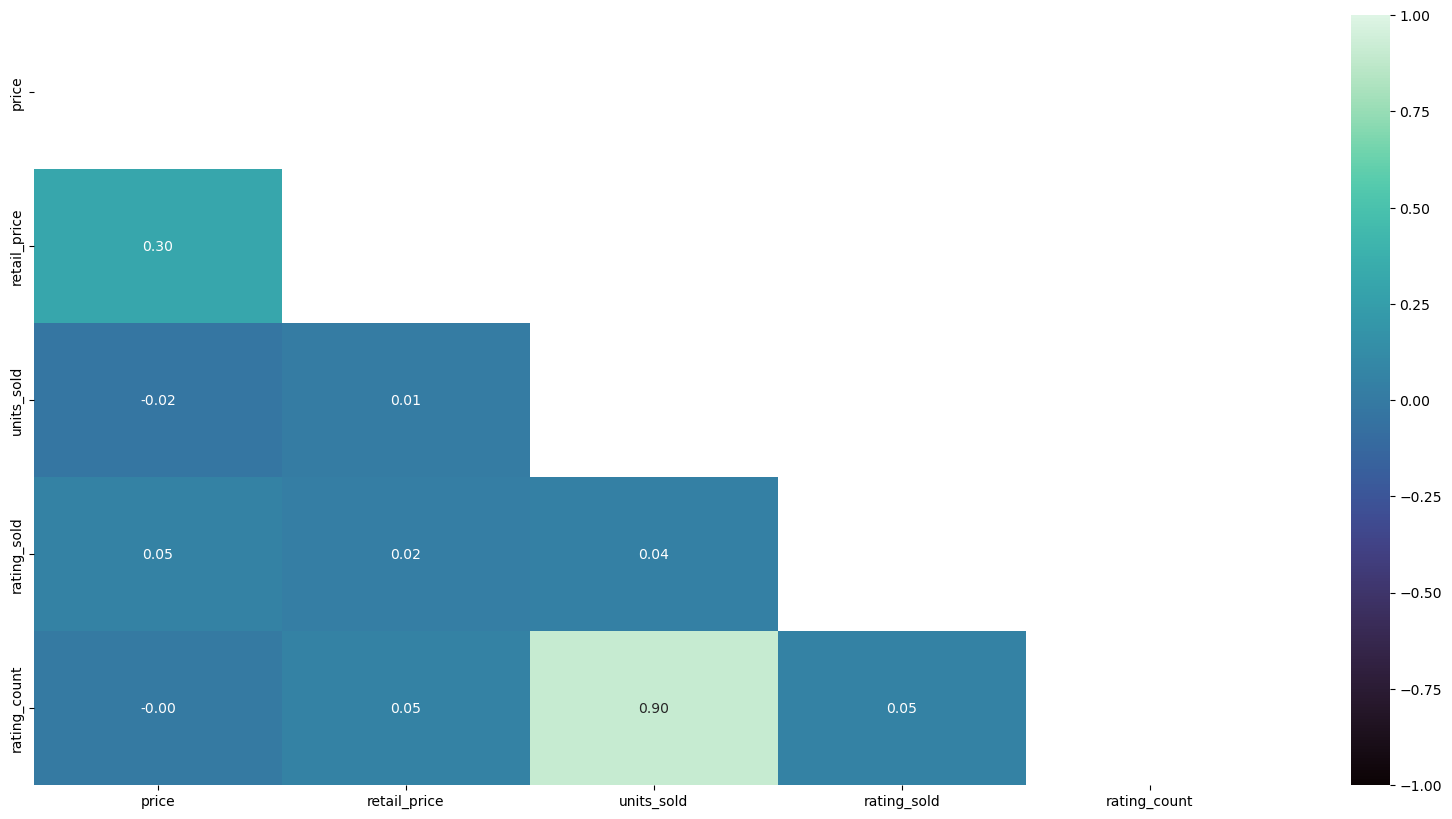

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap= 'mako', vmin=-1, vmax='1', mask = mask);

3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [26]:
# Generamos una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. 

pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True)


badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,0.525111,0.041958
Si,0.400509,0.032422
